# Titanic 5: Categorical encoding

So far, we have been only using numerical features for our model. By not using the categorical features, we were missing out on a lot of potentially important information.

As we will see, converting categorical features to numerical (so that they can be "digested" by the Scikit-Learn transformers and models) adds a bit of complexity to the modelling pipeline. This is why in this notebook we will start by encoding them without using pipelines (just to understand what's going) and only later we will include categorical encoding inside the pipeline.

Before going through this notebook, read the Platform lesson on One-Hot Encoding: https://learn.wbscodingschool.com/courses/data-science/lessons/%f0%9f%8f%97-3-ml-classification/topic/%f0%9f%93%9d-iteration-3-one-hot-encoding/

## 1. Data reading & splitting

In [377]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

original_housing_df = pd.read_csv('housing_iteration_3_classification.csv')
original_housing_df.head()

# X and y creation
X = original_housing_df.copy()#.drop(columns="LotFrontage")
y = X.pop("Expensive")

X['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [378]:
## Feature Engineering
#X.loc[:, "Street"] = X.Street.str[0]
X.sample(5)

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,MSZoning,Condition1,Heating,Street,CentralAir,Foundation
82,10206,78.0,1563,3,1,0,3,144,0,RL,Norm,GasA,Pave,Y,PConc
572,13159,83.0,846,3,0,0,2,208,0,RL,Norm,GasA,Pave,Y,PConc
1136,9600,80.0,1032,3,0,0,1,0,0,RL,Norm,GasA,Pave,Y,CBlock
1383,25339,NaN,816,3,0,0,2,0,0,RL,Norm,GasA,Pave,Y,BrkTil
862,9672,81.0,1040,3,0,0,2,0,0,RL,Norm,GasA,Pave,Y,PConc


## 2. Categorical encoding - "MANUAL" approach  (Without using Pipelines)

### 2.1. Replacing NaNs

We will need two different strategies to deal with missing values in numerical and categorical features.

#### 2.1.1. Replacing NaNs in categorical features

We were imputing the mean to NaN’s on our preprocessing pipeline for numerical features. There's a problem with categorical values: they don’t have a “mean”. Here, we will replace NaNs with a string that marks them: “N_A”. It is not an elegant solution, but it will allow us to move forward.

In [379]:
# selecting non-numerical columns
X_cat = X.select_dtypes(exclude="number")
X_cat_imputed = X_cat.copy() # we just copied it
# defining the imputer to use "N_A" as replacement value
#cat_imputer = SimpleImputer(strategy="constant", fill_value="N_A").set_output(transform='pandas')

# fitting and transforming
#X_cat_imputed = cat_imputer.fit_transform(X_train_cat)

#X_cat_imputed.head()

#### 2.1.2. Replacing NaNs in numerical features

This is what we already did in previous notebooks: replacing numerical NaNs with the mean of their column.

In [380]:
# Selecting numerical columns
X_num = X.select_dtypes(include="number")
# Imputing the mean
X_num_imputer = SimpleImputer(strategy="mean").set_output(transform='pandas')

# Fitting and transforming
X_num_imputed = num_imputer.fit_transform(X_num)

X_num_imputed.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
0,8450.0,65.0,856.0,3.0,0.0,0.0,2.0,0.0,0.0
1,9600.0,80.0,1262.0,3.0,1.0,0.0,2.0,298.0,0.0
2,11250.0,68.0,920.0,3.0,1.0,0.0,2.0,0.0,0.0
3,9550.0,60.0,756.0,3.0,1.0,0.0,3.0,0.0,0.0
4,14260.0,84.0,1145.0,4.0,1.0,0.0,3.0,192.0,0.0


In [381]:
# Concatenating all columns
X_imputed = pd.concat([X_cat_imputed, X_num_imputed], axis=1)

X_imputed.head()

,MSZoning,Condition1,Heating,Street,CentralAir,Foundation,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
0,RL,Norm,GasA,Pave,Y,PConc,8450.0,65.0,856.0,3.0,0.0,0.0,2.0,0.0,0.0
1,RL,Feedr,GasA,Pave,Y,CBlock,9600.0,80.0,1262.0,3.0,1.0,0.0,2.0,298.0,0.0
2,RL,Norm,GasA,Pave,Y,PConc,11250.0,68.0,920.0,3.0,1.0,0.0,2.0,0.0,0.0
3,RL,Norm,GasA,Pave,Y,BrkTil,9550.0,60.0,756.0,3.0,1.0,0.0,3.0,0.0,0.0
4,RL,Norm,GasA,Pave,Y,PConc,14260.0,84.0,1145.0,4.0,1.0,0.0,3.0,192.0,0.0


In [387]:
# data splitting
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=31416)

In [388]:
X_test.head()

,MSZoning,Condition1,Heating,Street,CentralAir,Foundation,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
1253,RL,Norm,GasA,Pave,Y,CBlock,17542.0,70.049958,1192.0,3.0,2.0,0.0,2.0,220.0,0.0
202,RL,Artery,GasA,Pave,Y,BrkTil,7000.0,50.000000,617.0,2.0,0.0,0.0,1.0,0.0,0.0
213,RL,Norm,GasA,Pave,Y,PConc,13568.0,43.000000,990.0,3.0,0.0,0.0,2.0,224.0,0.0
1331,RL,Norm,GasA,Pave,Y,CBlock,10780.0,55.000000,911.0,3.0,0.0,0.0,2.0,0.0,0.0
120,RL,Norm,GasA,Pave,Y,CBlock,21453.0,70.049958,938.0,1.0,2.0,0.0,2.0,0.0,0.0


### 2.2. One Hot encoding

As you have learnt in the Platform lesson, One Hot encoding means creating a new binary column for each category in every categorical column. Fortunately, a Scikit-Learn transformer takes care of everything.

#### 2.3.1. Fitting the `OneHotEncoder`

As with any transformer, we have to:
1. Import it
2. Initialize it
3. Fit it to the data
4. Use it to transform the data

In [389]:
# import
from sklearn.preprocessing import OneHotEncoder

X_train_cat = X_train.select_dtypes(exclude="number")
X_test_cat = X_test.select_dtypes(exclude="number")

X_train_num = X_train.select_dtypes(include="number")
X_test_num = X_test.select_dtypes(include="number")

# initialize
my_onehot = OneHotEncoder(drop="first", handle_unknown='infrequent_if_exist',min_frequency=0.03 ,sparse_output=False).set_output(transform='pandas')

# fit
my_onehot.fit(X_train_cat)

# transform
X_train_cat_onehot = my_onehot.transform(X_train_cat)
X_test_cat_onehot = my_onehot.transform(X_test_cat)

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [390]:
X_test_num.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
1253,17542.0,70.049958,1192.0,3.0,2.0,0.0,2.0,220.0,0.0
202,7000.0,50.000000,617.0,2.0,0.0,0.0,1.0,0.0,0.0
213,13568.0,43.000000,990.0,3.0,0.0,0.0,2.0,224.0,0.0
1331,10780.0,55.000000,911.0,3.0,0.0,0.0,2.0,0.0,0.0
120,21453.0,70.049958,938.0,1.0,2.0,0.0,2.0,0.0,0.0


We can see that all the columns contain either 0's or 1's. This is exactly how "one-hot" encoded columns (also called "dummy columns") look like: binary categories.

### 2.3.3. Concatenating "one-hot" columns with numerical columns:

Now that the categorical columns are numerical, we can join them back with the originally numerical columns and assemble the dataset that will be ready for modelling:

In [391]:
X_train_onehot = pd.concat([X_train_cat_onehot, X_train_num], axis=1)

X_train_onehot.head()

,MSZoning_RL,MSZoning_RM,MSZoning_infrequent_sklearn,Condition1_Feedr,Condition1_Norm,Condition1_infrequent_sklearn,Heating_infrequent_sklearn,Street_infrequent_sklearn,CentralAir_Y,Foundation_CBlock,...,Foundation_infrequent_sklearn,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
772,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,7819.0,94.000000,1029.0,3.0,1.0,0.0,2.0,144.0,0.0
157,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,12003.0,92.000000,774.0,4.0,1.0,0.0,3.0,0.0,0.0
360,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,7540.0,70.049958,888.0,2.0,1.0,0.0,2.0,0.0,192.0
744,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,5395.0,41.000000,1337.0,2.0,1.0,0.0,2.0,96.0,0.0
150,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,10356.0,120.000000,969.0,3.0,0.0,0.0,2.0,0.0,0.0


In [392]:
X_test_onehot = pd.concat([X_test_cat_onehot, X_test_num], axis=1)

X_test_onehot.head()

,MSZoning_RL,MSZoning_RM,MSZoning_infrequent_sklearn,Condition1_Feedr,Condition1_Norm,Condition1_infrequent_sklearn,Heating_infrequent_sklearn,Street_infrequent_sklearn,CentralAir_Y,Foundation_CBlock,...,Foundation_infrequent_sklearn,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
1253,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,17542.0,70.049958,1192.0,3.0,2.0,0.0,2.0,220.0,0.0
202,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,7000.0,50.000000,617.0,2.0,0.0,0.0,1.0,0.0,0.0
213,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,13568.0,43.000000,990.0,3.0,0.0,0.0,2.0,224.0,0.0
1331,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,10780.0,55.000000,911.0,3.0,0.0,0.0,2.0,0.0,0.0
120,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,21453.0,70.049958,938.0,1.0,2.0,0.0,2.0,0.0,0.0


In [393]:
### Pruning the tree
my_tree = DecisionTreeClassifier(max_depth=15,
                                 min_samples_leaf=96
                                )

In [394]:
my_tree.fit(X = X_train_onehot,
            y = y_train)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=96)

In [395]:
y_pred_tree_train = my_tree.predict(X_train_onehot)

In [396]:
accuracy_score(y_true = y_train,
               y_pred = y_pred_tree_train)

0.898972602739726

In [397]:
y_pred_tree_test = my_tree.predict(X_test_onehot)

In [398]:
accuracy_score(y_true = y_test,
               y_pred = y_pred_tree_test
              )

0.9075342465753424

## 3. Categorical encoding - "Automated" approach (Using Pipelines)

In the manual approach, to encode the categorical columns numerically, we have:

1. Selected the categorical columns.
2. Fitted a `OneHotEncoder` to them.
3. Transformed the categorical columns with the encoder.
4. Converted the sparse matrix into a dataframe.
5. Recovered the names of the columns.
6. Concatenated the one-hot columns with the numerical columns.

All these steps can be synthetised by using Scikit-Learn Pipelines and specifically something called `ColumnTransformer`, which allows us to apply different transformations to two or more groups of columns: in our case, categorical and numerical columns.

This process is also called creating "branches" in the pipeline. One branch for the categorical columns and another for the numerical columns. Each branch will contain as many transformers as we want. Then, the branches will meet again, and the transformed columns will be automatically concatenated. Let's see the process in action:

### 3.1. Creating the "numeric pipe" and the "categoric pipe"

In [399]:
# X and y creation
X = original_housing_df.copy()
y = X.pop("Expensive")

# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31416)

# select categorical and numerical column names
X_cat_columns = X.select_dtypes(exclude="number").columns
X_num_columns = X.select_dtypes(include="number").columns

# create numerical pipeline, only with the SimpleImputer(strategy="mean")
numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"))

 # create categorical pipeline, with the SimpleImputer(fill_value="N_A") and the OneHotEncoder
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(sparse_output=False,handle_unknown='infrequent_if_exist',min_frequency=0.03)
)

### 3.2. Using `ColumnTransformer` a pipeline with 2 branches (the `preprocessor`)

We simply tell the pipeline the following:

- One branch, called `"num_pipe"`, will apply the steps in the `numeric_pipe` to the columns named in `X_num_columns`
- The second branch, called `"cat_pipe"`, will apply the steps in the `categoric_pipe` to the columns named in `X_cat_columns`

In [400]:
from sklearn.compose import make_column_transformer

preprocessor = make_column_transformer(
    (numeric_pipe, X_num_columns),
    (categoric_pipe, X_cat_columns),
)

### 3.3. Creating the `full_pipeline` (`preprocessor` + Decision Tree)

Pipelines are modular. The `preprocessor` we created above with the `ColumnTransformer` can become now a step in a new pipeline, that we'll call `full_pipeline` and will include, as a last step, a Decision Tree model:

In [401]:
full_pipeline = make_pipeline(preprocessor,
                              DecisionTreeClassifier())

We can then fit this `full_pipeline` to the data:

In [402]:
# Notice that we did not fit the `preprocessor` before — we only fit the pipeline once it has been fully assembled.
full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch'],
      dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='N_A',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                 min_frequency=0.03,
                                                                                 sparse_output=False))]),
                                                  Index(['MSZoning', 'Condition1', 'Heating', 'Street', 'CentralAir',
       'Foundation'],
      dtype='object'))])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

This full pipeline can make predictions, as can any other pipeline that ends with a model:

In [403]:
full_pipeline.named_steps['decisiontreeclassifier'].get_depth()

15

In [404]:
full_pipeline.named_steps['decisiontreeclassifier'].get_n_leaves()

95

In [405]:
full_pipeline.named_steps['decisiontreeclassifier'].get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [406]:
y_pred_tree_train_2 = full_pipeline.predict(X_train)

In [407]:
accuracy_score(y_true = y_train,
               y_pred = y_pred_tree_train_2)

1.0

In [408]:
y_pred_tree_test_2 = full_pipeline.predict(X_test)

In [409]:
accuracy_score(y_true = y_test,
               y_pred = y_pred_tree_test_2
              )

0.910958904109589

In [419]:
from sklearn.model_selection import GridSearchCV

# define parameter grid
param_grid = {
    'columntransformer__pipeline-1__simpleimputer__strategy':['mean', 'median'],
    'decisiontreeclassifier__max_depth': range(10, 18, 2),
    'decisiontreeclassifier__min_samples_leaf': range(85, 100, 5),
    'decisiontreeclassifier__min_samples_split': range(3, 40, 5),
    'decisiontreeclassifier__criterion':['gini', 'entropy']
}

# define GridSearchCV
search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=10, # the value for K in K-fold Cross Validation
                      scoring='accuracy', # the performance metric to use,
                      verbose=1)

search.fit(X_train, y_train)

scores = {"dtree" : search.best_score_}
scores

Fitting 10 folds for each of 384 candidates, totalling 3840 fits


{'dtree': 0.8989610963748895}

In [420]:
best_param = search.best_params_
best_param

{'columntransformer__pipeline-1__simpleimputer__strategy': 'mean',
 'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': 10,
 'decisiontreeclassifier__min_samples_leaf': 85,
 'decisiontreeclassifier__min_samples_split': 3}

In [421]:
# training accuracy
y_train_pred = search.predict(X_train)
accuracy_score(y_train, y_train_pred)

0.898972602739726

In [422]:
# testing accuracy
y_test_pred = search.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.9075342465753424

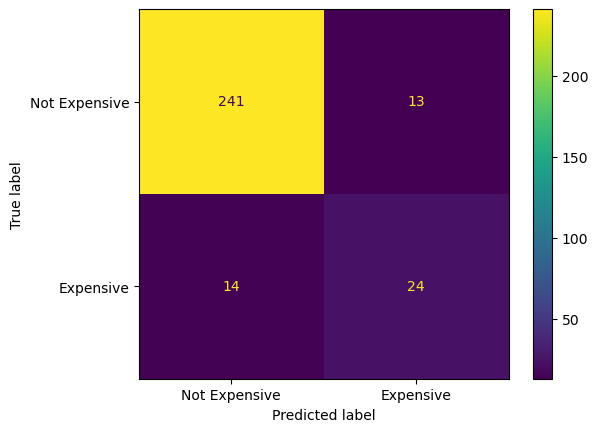

In [423]:
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(search, X_test, y_test, display_labels=['Not Survied', 'Survived']);

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(search,
                                      X_test,
                                      y_test,
                                      display_labels=['Not Expensive','Expensive']);

### 3.4 Accessing steps of the pipeline

The estimators of a pipeline are stored as a list in the steps attribute, but can be accessed by index or name by indexing the Pipeline:

In [415]:
# first step in our pipeline is Simpleimputer

# we can access it with an index
full_pipeline[0]

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch'],
      dtype='object')),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='N_A',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                min_frequency=0.03,
                                                                sparse_output=False))]),
                                 Index(['MSZoning', 'Condition1', 'Heating', 'Street', 'CentralAir',
       'Foundation'],
      dtype='object'))])

In [416]:
# or by it's name
full_pipeline['columntransformer']

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch'],
      dtype='object')),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='N_A',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                min_frequency=0.03,
                                                                sparse_output=False))]),
                                 Index(['MSZoning', 'Condition1', 'Heating', 'Street', 'CentralAir',
       'Foundation'],
      dtype='object'))])

`named_steps` helps you navigate through the pipeline.   
When using it, you get the autocompletion active after every step.  
With `get_features_names_out()' you can get printed column names that specific estimator used

In [417]:
(full_pipeline
 .named_steps.columntransformer
 .named_transformers_['pipeline-1']
 .named_steps.simpleimputer
 .get_feature_names_out()
 )

array(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr',
       'Fireplaces', 'PoolArea', 'GarageCars', 'WoodDeckSF',
       'ScreenPorch'], dtype=object)

We can also get parameters out of any specific step, e.g. catogeries from onehotencoder step:

In [418]:
full_pipeline.named_steps.columntransformer.named_transformers_['pipeline-2'].named_steps.onehotencoder.categories_

[array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object),
 array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe',
        'RRNn'], dtype=object),
 array(['GasA', 'GasW', 'Grav', 'OthW', 'Wall'], dtype=object),
 array(['Grvl', 'Pave'], dtype=object),
 array(['N', 'Y'], dtype=object),
 array(['BrkTil', 'CBlock', 'PConc', 'Slab', 'Stone', 'Wood'], dtype=object)]

### 3.5 Including the imputer to the GridSearchCV

If you want to include a parameter to the parameter grid you have to navigate through the pipe. For example, if one wants to include the SimpleImputer of the numerical pipe into the grid search the path to the SimpleImputer must be given. In this case the path is: **columntransformet-pieline-1-simpleimputer**. One can see every step on the diagram of the pipe. Have in mind that in the parameter grid dictionary each step is distinguished one from another by the two lower dashes ("__")

In [333]:
from sklearn.model_selection import GridSearchCV

# define parameter grid
param_grid = {
    "columntransformer__pipeline-1__simpleimputer__strategy":["mean", "median"],
    "decisiontreeclassifier__max_depth": range(2, 14, 2),
    "decisiontreeclassifier__min_samples_leaf": range(3, 12, 2)
}

# define GridSearchCV
search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search.fit(X_train, y_train)

best_param = search.best_params_

best_param

Fitting 5 folds for each of 60 candidates, totalling 300 fits


{'columntransformer__pipeline-1__simpleimputer__strategy': 'mean',
 'decisiontreeclassifier__max_depth': 4,
 'decisiontreeclassifier__min_samples_leaf': 11}

### **Exercise 1:** use the new Pipeline with branches to train a DecisionTree with GridSearch cross validation.

We are basically asking to combine what you have learned in this notebook (categorical encoding & branches) with what you learned in the previous one (using `GridSearchCV` for a whole Pipeline).